<a href="https://colab.research.google.com/github/nabilahaffryda/PVCK_Genap_2021/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import html
import time

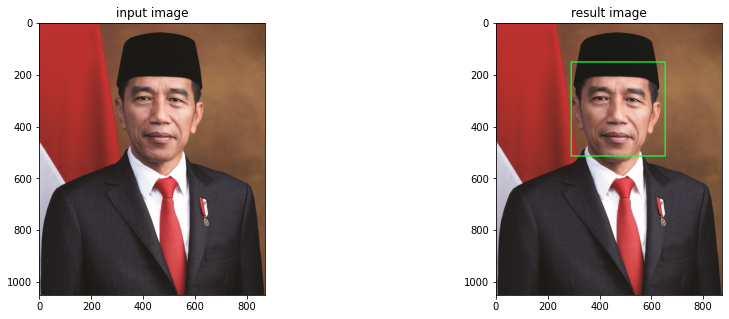

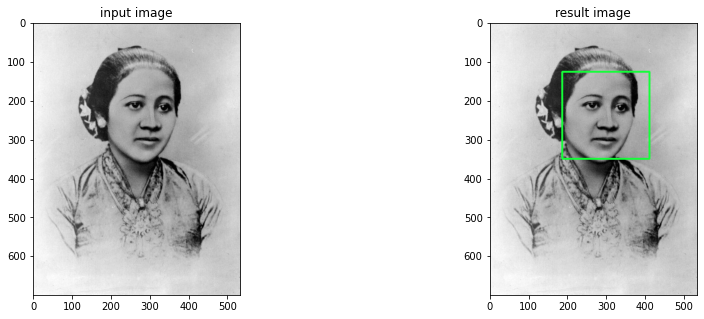

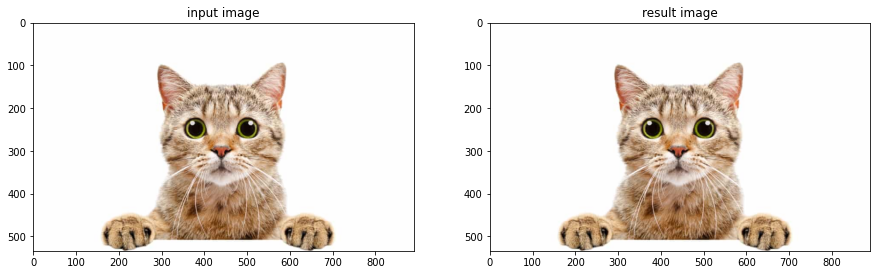

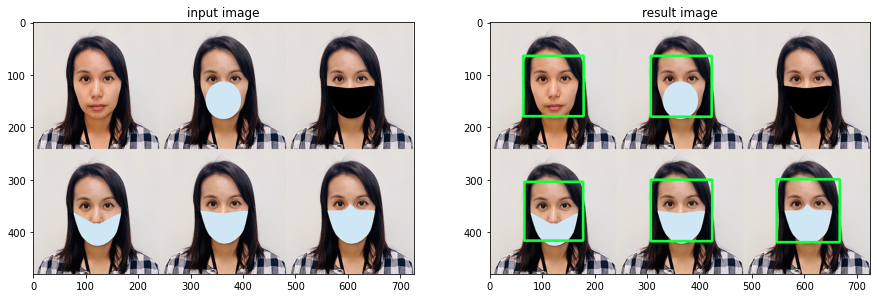

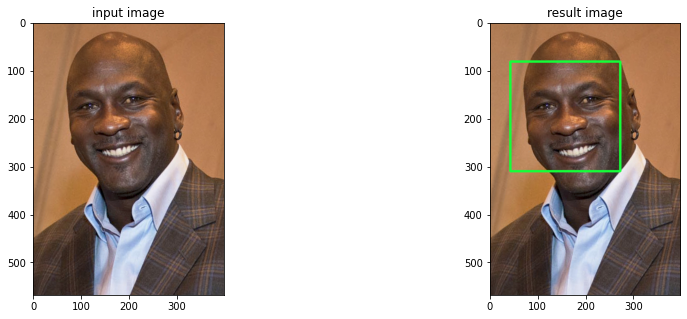

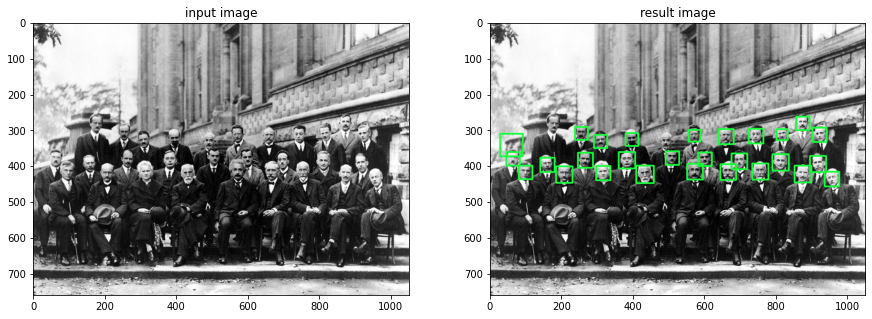

In [7]:
def cascade_photos(input,template):
  cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_alt.xml')
  roi_wajah = cascade_wajah.detectMultiScale(template)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(template,(x,y),(x+w,y+h),(57,255,20),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5)) #create 2 plots for the input image and template 
  axarr[0].imshow(cv.cvtColor(input, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
  axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("result image")

jokowi_real = cv.imread('/content/drive/MyDrive/Images/facedet/jokowi.jpg')
jokowi = cv.imread('/content/drive/MyDrive/Images/facedet/jokowi.jpg')

kartini_real = cv.imread('/content/drive/MyDrive/Images/facedet/kartini.jpg')
kartini = cv.imread('/content/drive/MyDrive/Images/facedet/kartini.jpg')

kucing_real = cv.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg')
kucing = cv.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg')

mask_real = cv.imread('/content/drive/MyDrive/Images/facedet/mask.png')
mask = cv.imread('/content/drive/MyDrive/Images/facedet/mask.png')

mjordan_real = cv.imread('/content/drive/MyDrive/Images/facedet/mjordan.jpg')
mjordan = cv.imread('/content/drive/MyDrive/Images/facedet/mjordan.jpg')

solvayconf_real = cv.imread('/content/drive/MyDrive/Images/facedet/solvayconf.jpg')
solvayconf = cv.imread('/content/drive/MyDrive/Images/facedet/solvayconf.jpg')

cascade_photos(jokowi_real,jokowi)
cascade_photos(kartini_real,kartini)
cascade_photos(kucing_real,kucing)
cascade_photos(mask_real,mask)
cascade_photos(mjordan_real,mjordan)
cascade_photos(solvayconf_real,solvayconf)

(<matplotlib.image.AxesImage at 0x7fea13da8e50>,
 Text(0.5, 1.0, 'result image'))

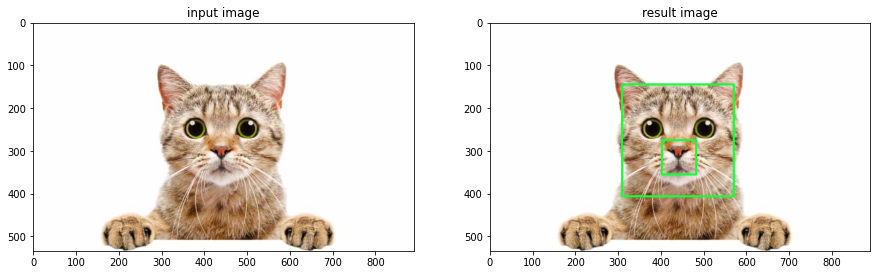

In [13]:
kucing_real = cv.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg')
kucing = cv.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg')
cascade_kucing = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalcatface.xml')
roi_wajah = cascade_kucing.detectMultiScale(kucing)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(kucing,(x,y),(x+w,y+h),(57,255,20),3)
f, axarr = plt. subplots(1,2,figsize=(15,5))  
axarr[0].imshow(cv.cvtColor(kucing_real, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(kucing, cv.COLOR_BGR2RGB)), axarr[1].set_title("result image")

(<matplotlib.image.AxesImage at 0x7fea13c4ead0>,
 Text(0.5, 1.0, 'result image'))

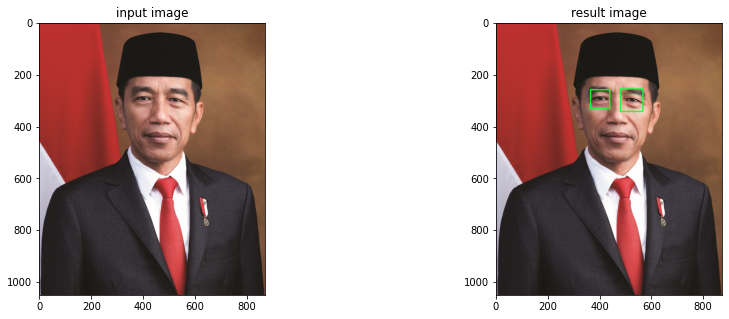

In [14]:
jokowi_real = cv.imread('/content/drive/MyDrive/Images/facedet/jokowi.jpg')
jokowi = cv.imread('/content/drive/MyDrive/Images/facedet/jokowi.jpg')
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_eye.xml')
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(57,255,20),3)
f, axarr = plt. subplots(1,2,figsize=(15,5))  
axarr[0].imshow(cv.cvtColor(jokowi_real, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB)), axarr[1].set_title("result image")

In [16]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [17]:
# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_default.xml')

In [18]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


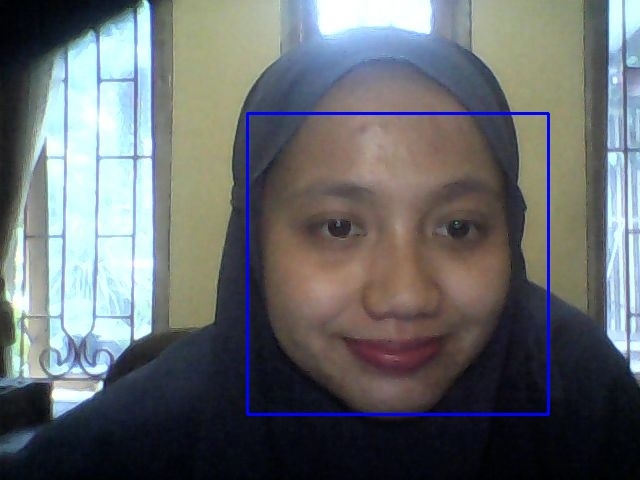

In [20]:
# take photo from webcamera
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [27]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [26]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

(<matplotlib.image.AxesImage at 0x7fea13bed1d0>,
 Text(0.5, 1.0, 'result image'))

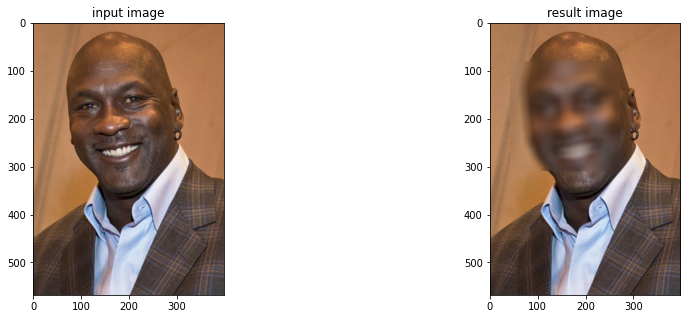

In [15]:
mjordan_real = cv.imread('/content/drive/MyDrive/Images/facedet/mjordan.jpg')
mjordan = cv.imread('/content/drive/MyDrive/Images/facedet/mjordan.jpg')
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_alt.xml')
roi_wajah = cascade_wajah.detectMultiScale(mjordan)
for(x,y,w,h) in roi_wajah:
  # cv.rectangle(mjordan,(x,y),(x+w,y+h),(255,255,255),3)
  roi = mjordan[y:y+h, x:x+w]
  # applying a gaussian blur over this new rectangle area
  roi = cv.GaussianBlur(roi, (23, 23), 30)
  # impose this blurred image on original image to get final image
  mjordan[y:y+roi.shape[0], x:x+roi.shape[1]] = roi
  
f, axarr = plt. subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv.cvtColor(mjordan_real, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(mjordan, cv.COLOR_BGR2RGB)), axarr[1].set_title("result image")